### Library Imports

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Loading in dataset

In [61]:
# Correct file path
file_path = 'Impact_of_Remote_Work_on_Mental_Health.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the Sample
data.sample(5)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
268,EMP0269,58,Female,Marketing,Retail,12,Onsite,36,7,4,Medium,Burnout,No,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4372,EMP4373,23,Non-binary,Marketing,Manufacturing,34,Hybrid,44,3,2,High,Anxiety,Yes,No Change,5,Satisfied,3,NaN,Average,South America
118,EMP0119,38,Female,Data Scientist,Manufacturing,1,Hybrid,22,4,2,Medium,Burnout,Yes,Increase,5,Satisfied,3,Daily,Average,Europe
2671,EMP2672,36,Male,HR,Manufacturing,21,Remote,34,14,4,Medium,Burnout,No,Decrease,5,Satisfied,5,NaN,Good,Europe
2209,EMP2210,22,Prefer not to say,HR,Manufacturing,11,Remote,54,0,2,High,Anxiety,Yes,No Change,3,Satisfied,3,Weekly,Poor,Africa


### Data Wrangling

In [62]:
# Making a df with the datatypes of the columns
data_types = pd.DataFrame(data.dtypes, columns=['Data Type'])
data_types.reset_index(inplace=True)
data_types.columns = ['Feature', 'Data Type']

# Display the data types
data_types

,Feature,Data Type
0,Employee_ID,object
1,Age,int64
2,Gender,object
3,Job_Role,object
4,Industry,object
5,Years_of_Experience,int64
6,Work_Location,object
7,Hours_Worked_Per_Week,int64
8,Number_of_Virtual_Meetings,int64
9,Work_Life_Balance_Rating,int64


In [63]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Mental_Health_Condition    1196
Physical_Activity          1629
dtype: int64

In [64]:
# Fill missing values in Mental_Health_Condition with the mode
data['Mental_Health_Condition'].fillna(data['Mental_Health_Condition'].mode()[0], inplace=True)

# Create a second duplicate DataFrame with 'Physical_Activity' column
data_physical_activity = data.copy()

# Remove the rows with missing values in the 'Physical_Activity' column
data.dropna(subset=['Physical_Activity'], inplace=True)

In [65]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Exploratory Data Analysis

In [66]:
# data.describe(include='all')
data.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000
mean,40.882527,17.775438,39.593592,7.507268,2.979828,2.996737,2.994957
std,11.289993,9.974969,11.929307,4.616464,1.420769,1.389977,1.392958
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,3.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,39.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


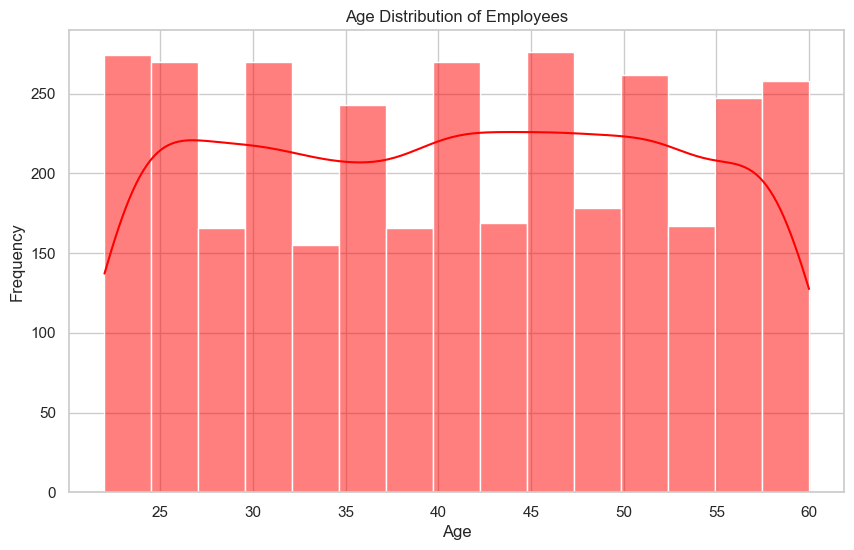

In [67]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=15, kde=True, color='red')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

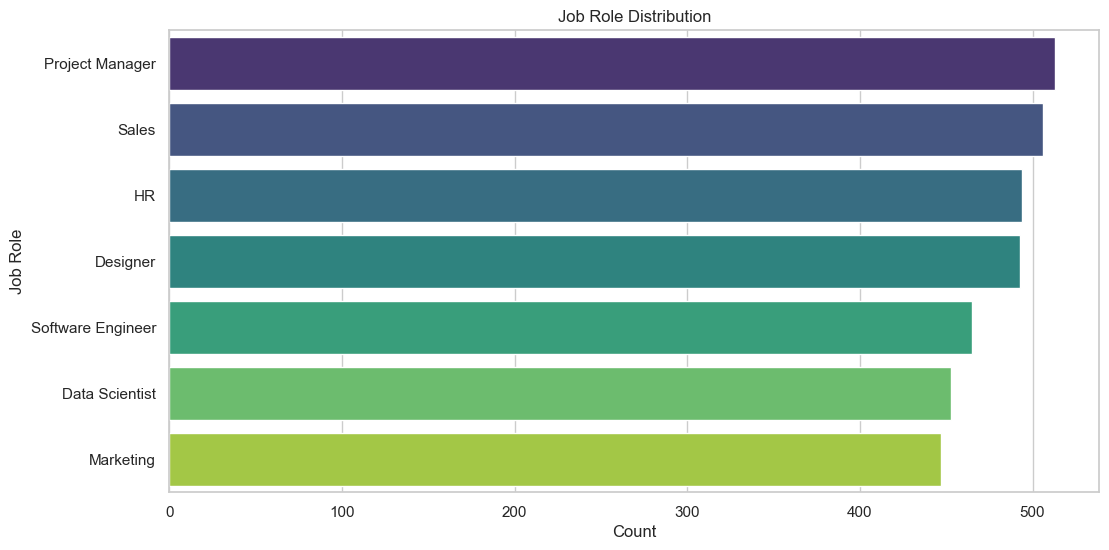

In [68]:
# Count the occurrences of each job role
job_role_counts = data['Job_Role'].value_counts()

# Display the job role counts
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Job_Role', order=data['Job_Role'].value_counts().index, palette='viridis')
plt.title('Job Role Distribution')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()


#### Distribution Analysis

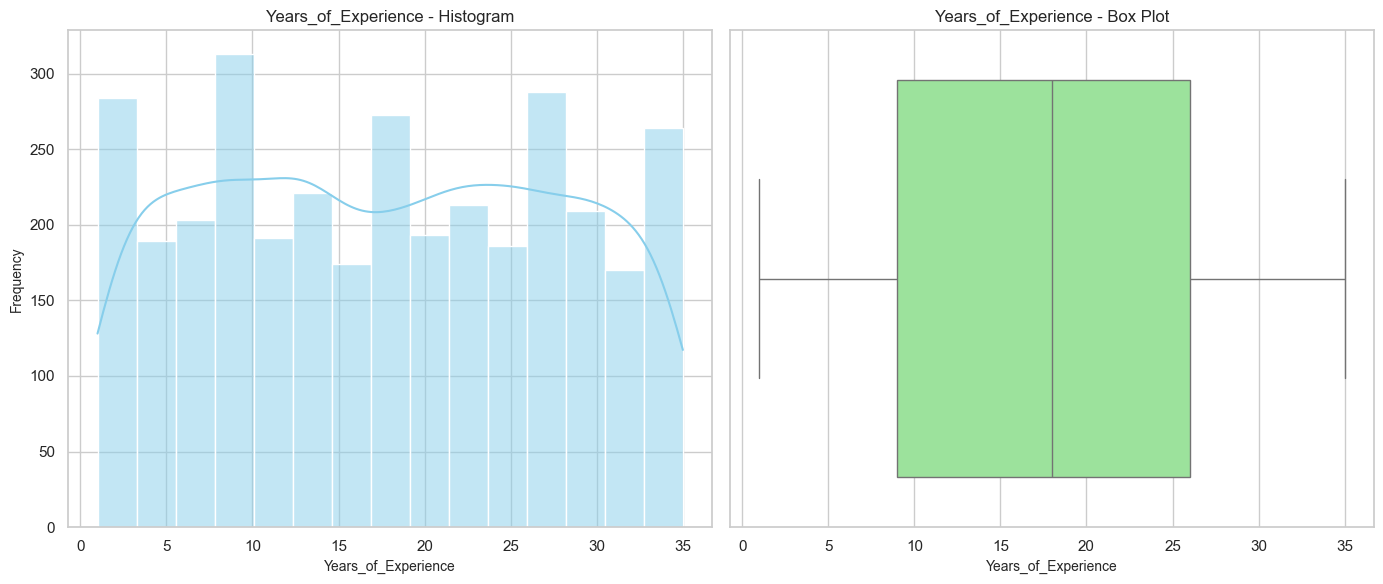

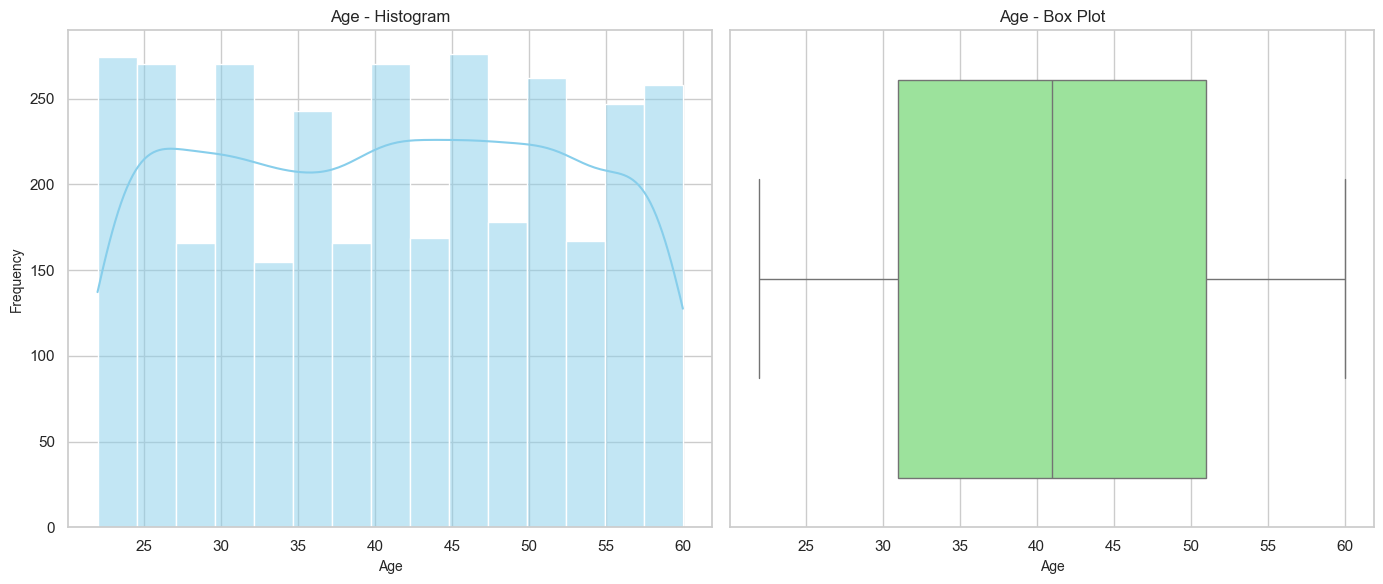

In [69]:
# List of columns to visualize
columns_to_visualize = [
    'Years_of_Experience', 
    'Age'
]

# Loop through each column and plot histogram and box plot
for column in columns_to_visualize:
    if column in data.columns:  # Check if the column exists in the DataFrame
        plt.figure(figsize=(14, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, color='skyblue')
        plt.title(f'{column} - Histogram', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        
        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'{column} - Box Plot', fontsize=12)
        plt.xlabel(column, fontsize=10)
        
        # Show the plots
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{column}' not found in the DataFrame.")


#### Data Visualization

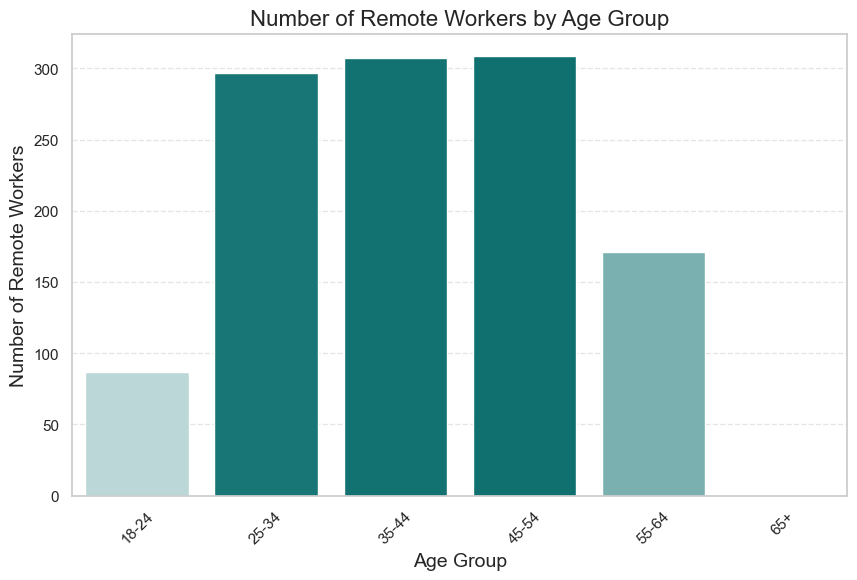

In [70]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]  # Define your age groups
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Age group labels
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate the number of remote workers in each age group
remote_work_counts = data[data['Work_Location'] == 'Remote']['Age_Group'].value_counts().sort_index()

# Normalize the remote work counts to use for color intensity
normalized_counts = (remote_work_counts - remote_work_counts.min()) / (remote_work_counts.max() - remote_work_counts.min())

# Create a custom color palette using shades of teal and aqua
base_color = np.array([0, 128, 128])  # Teal base color (R, G, B)
colors = [
    (base_color + (255 - base_color) * (1 - norm)) / 255
    for norm in normalized_counts
]

# Create a bar plot with the customized colors
plt.figure(figsize=(10, 6))
sns.barplot(x=remote_work_counts.index, y=remote_work_counts.values, palette=colors)
plt.title('Number of Remote Workers by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Remote Workers', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


Employees aged 25-54 are significantly more likely to work remotely compared to other age groups.

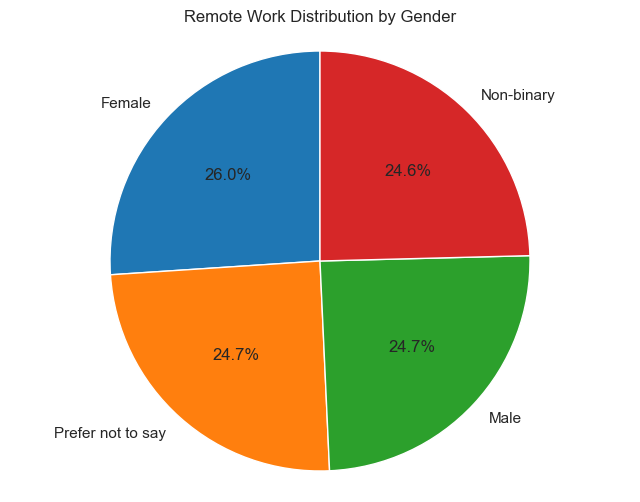

In [71]:
# Filtering the DataFrame for remote work
remote_work_counts = data[data['Work_Location'] == 'Remote']['Gender'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
# Using a fresh color palette with four colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Adjust colors as necessary
plt.pie(remote_work_counts, labels=remote_work_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

# Title
plt.title('Remote Work Distribution by Gender')

# Show the plot
plt.show()


['Hybrid' 'Remote' 'Onsite']
['Medium' 'High' 'Low']
Correlation between Work Location and Stress Levels:
                       Work_Location_Encoded  Stress_Level_Encoded
Work_Location_Encoded                1.00000              -0.02424
Stress_Level_Encoded                -0.02424               1.00000


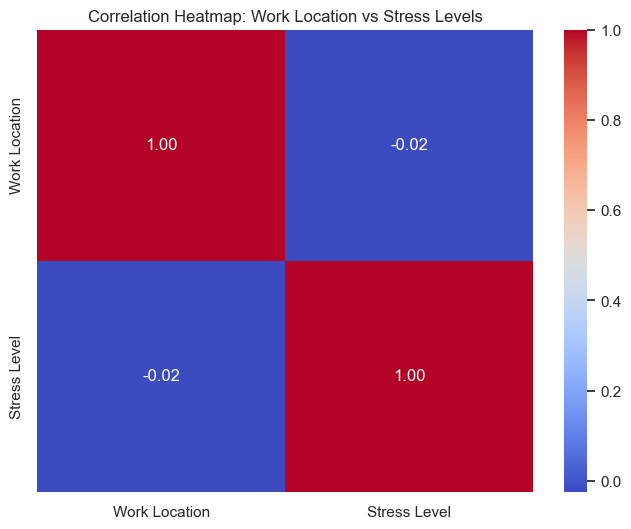

In [72]:
# Check for unique values in Work_Location and Stress_Level
print(data['Work_Location'].unique())
print(data['Stress_Level'].unique())

# Encoding the 'Work_Location' and 'Stress_Level' for correlation analysis
# Mapping work location to numeric values
data['Work_Location_Encoded'] = data['Work_Location'].map({
    'Remote': 1,
    'Hybrid': 2,
    'Onsite': 3
})

# Map stress levels to numeric values (check the unique values in your dataset)
stress_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    # Add more mappings if your dataset has different values
}

data['Stress_Level_Encoded'] = data['Stress_Level'].map(stress_mapping)

# Drop rows with NaN values in the relevant columns
correlation_data = data.dropna(subset=['Work_Location_Encoded', 'Stress_Level_Encoded'])

# Calculate correlation
correlation = correlation_data[['Work_Location_Encoded', 'Stress_Level_Encoded']].corr()
print("Correlation between Work Location and Stress Levels:")
print(correlation)

# Check if the correlation DataFrame is generated correctly
if not correlation.empty:
    # Visualization of the correlation
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
                xticklabels=['Work Location', 'Stress Level'], 
                yticklabels=['Work Location', 'Stress Level'])
    plt.title('Correlation Heatmap: Work Location vs Stress Levels')
    plt.show()
else:
    print("Correlation DataFrame is empty. Please check your data.")

 There is a relationship between work location (remote, hybrid, or onsite) and stress levels (low, medium, or high). If the correlation is positive, it means that as more people work remotely, their stress levels tend to increase

 *Reason:* Remote employees often report higher stress levels than those in office settings, mainly due to social isolation, work-life balance challenges, and communication issues. However, experiences vary, and some may find remote work less stressful than traditional offices.

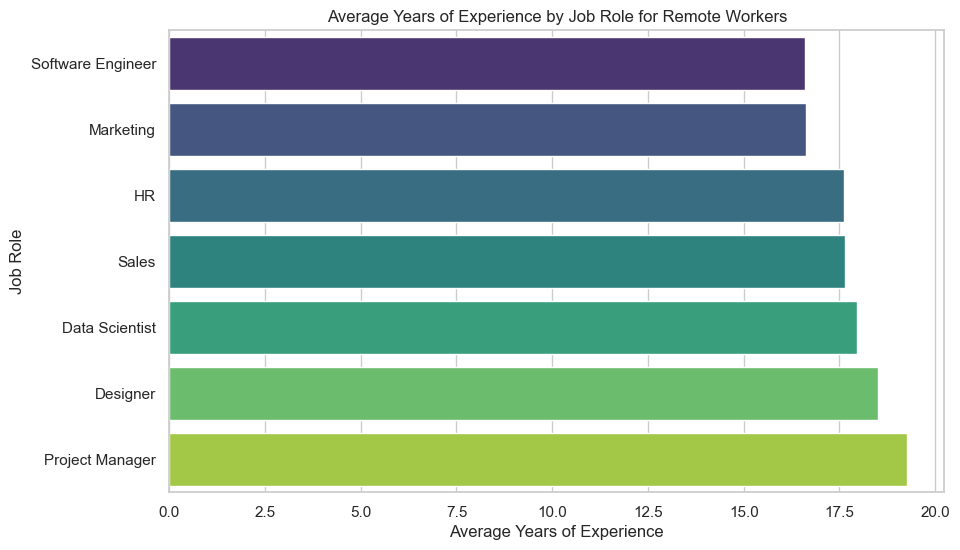

In [73]:
# Filter the data for remote workers
remote_work_data = data[data['Work_Location'] == 'Remote']

# Group the data by 'Job_Role' and calculate the average years of experience
experience_by_role = remote_work_data.groupby('Job_Role')['Years_of_Experience'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=experience_by_role.values, y=experience_by_role.index, palette='viridis')
plt.title('Average Years of Experience by Job Role for Remote Workers')
plt.xlabel('Average Years of Experience')
plt.ylabel('Job Role')
plt.show()


 In remote work, Project Managers, Designers, and HR roles are usually taken by people with more experience.

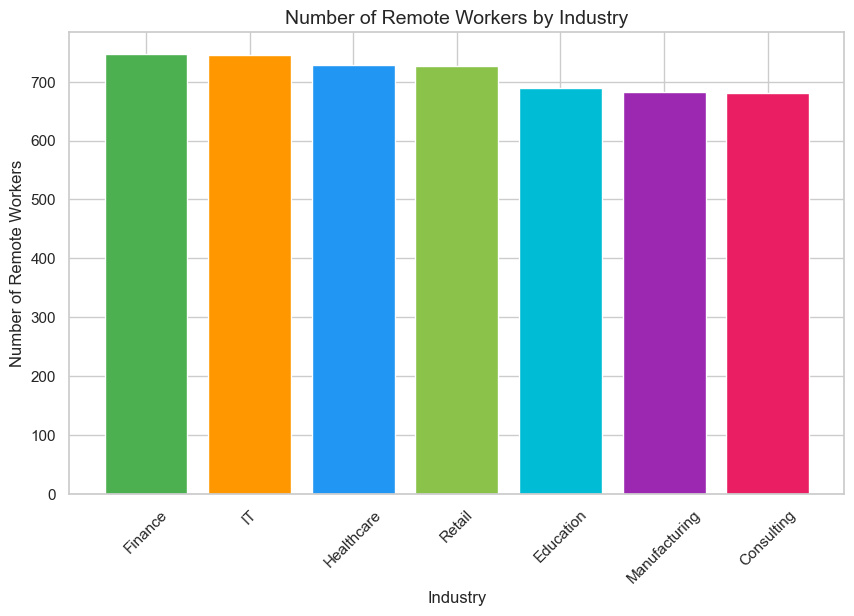

In [74]:
industries = ['Finance', 'IT', 'Healthcare', 'Retail', 'Education', 'Manufacturing', 'Consulting']
remote_worker_counts = [747, 746, 728, 726, 690, 683, 680]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(industries, remote_worker_counts, color=['#4CAF50', '#FF9800', '#2196F3', '#8BC34A', '#00BCD4', '#9C27B0', '#E91E63'])
plt.title('Number of Remote Workers by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Remote Workers', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()



 People in the Finance, IT and Healthcare industries are more likely to work remotely. This reflects a growing trend toward flexible work arrangements in these sectors.

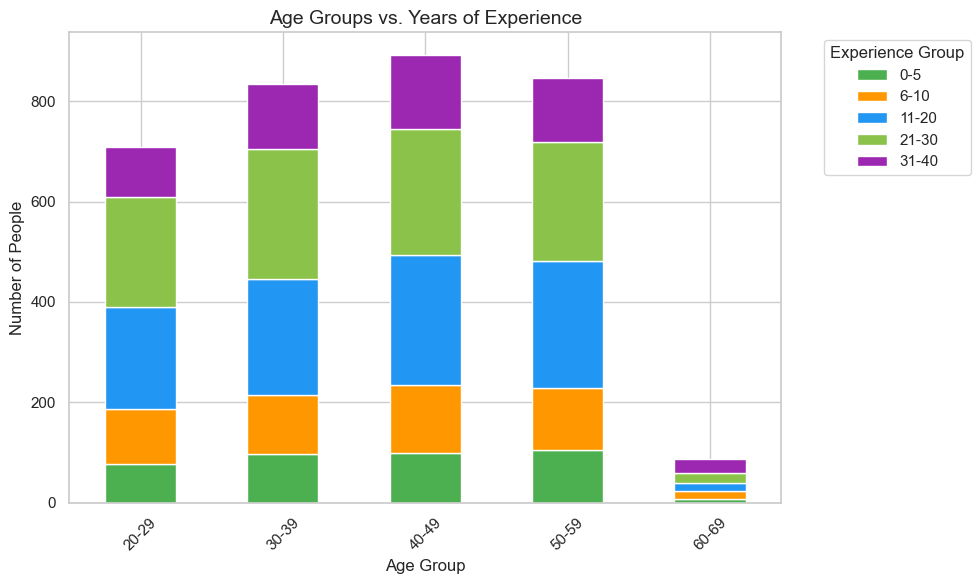

In [75]:
# Categorize ages into groups
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Categorize years of experience into groups
experience_bins = [0, 5, 10, 20, 30, 40]
experience_labels = ['0-5', '6-10', '11-20', '21-30', '31-40']
data['Experience_Group'] = pd.cut(data['Years_of_Experience'], bins=experience_bins, labels=experience_labels, right=False)

# Count the number of people in each age and experience group
age_experience_counts = data.groupby(['Age_Group', 'Experience_Group']).size().unstack()

# Plotting the grouped bar plot
age_experience_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4CAF50', '#FF9800', '#2196F3', '#8BC34A', '#9C27B0'])
plt.title('Age Groups vs. Years of Experience', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Experience Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 Older people usually Age (60-69) have more work experience. This means that as people get older, they gain more skills and knowledge from their jobs. 

 // No need to add i think

<Figure size 1200x800 with 0 Axes>

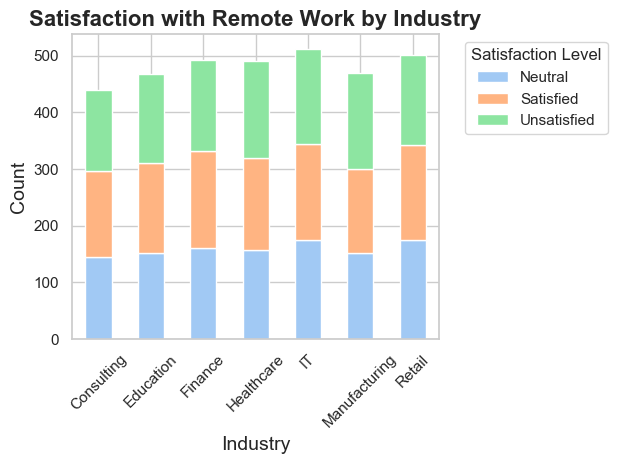

In [76]:

# Calculate the counts for each satisfaction category by industry
satisfaction_by_industry = data.groupby('Industry')['Satisfaction_with_Remote_Work'].value_counts().unstack()

# Create a bar plot for satisfaction levels by industry
plt.figure(figsize=(12, 8))
satisfaction_by_industry.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))
plt.title('Satisfaction with Remote Work by Industry', fontsize=16, fontweight='bold')
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

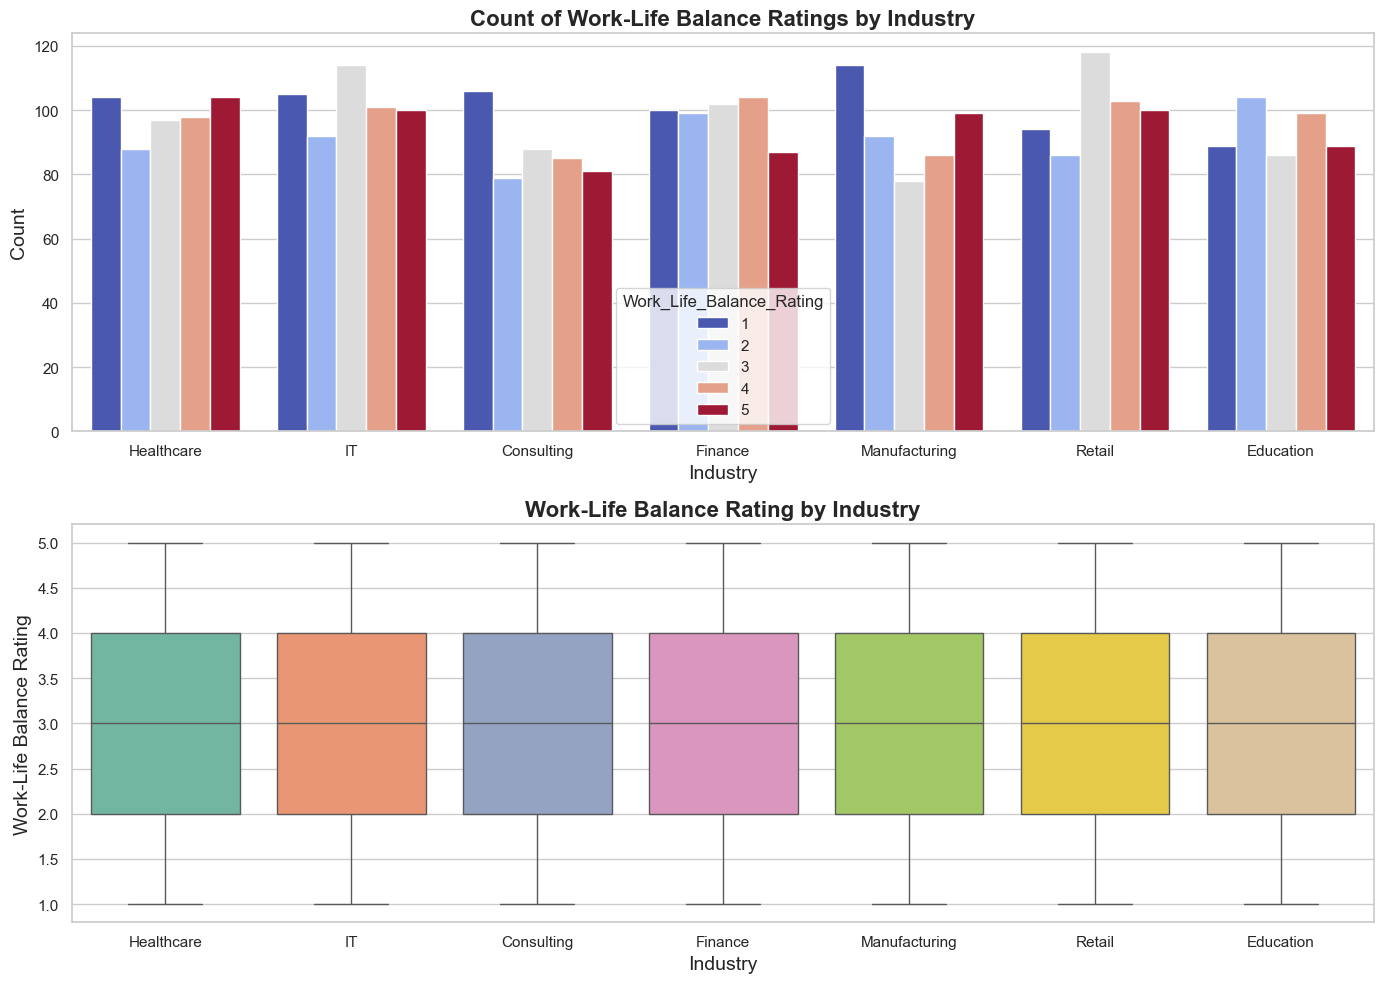

In [77]:

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure for the plots
plt.figure(figsize=(14, 10))

# Count Plot for Work-Life Balance Rating by Industry
plt.subplot(2, 1, 1)
sns.countplot(x='Industry', hue='Work_Life_Balance_Rating', data=data, palette='coolwarm')
plt.title('Count of Work-Life Balance Ratings by Industry', fontsize=16, fontweight='bold')
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Box Plot for Work-Life Balance Rating by Industry
plt.subplot(2, 1, 2)
sns.boxplot(x='Industry', y='Work_Life_Balance_Rating', data=data, palette='Set2')
plt.title('Work-Life Balance Rating by Industry', fontsize=16, fontweight='bold')
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Work-Life Balance Rating', fontsize=14)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()



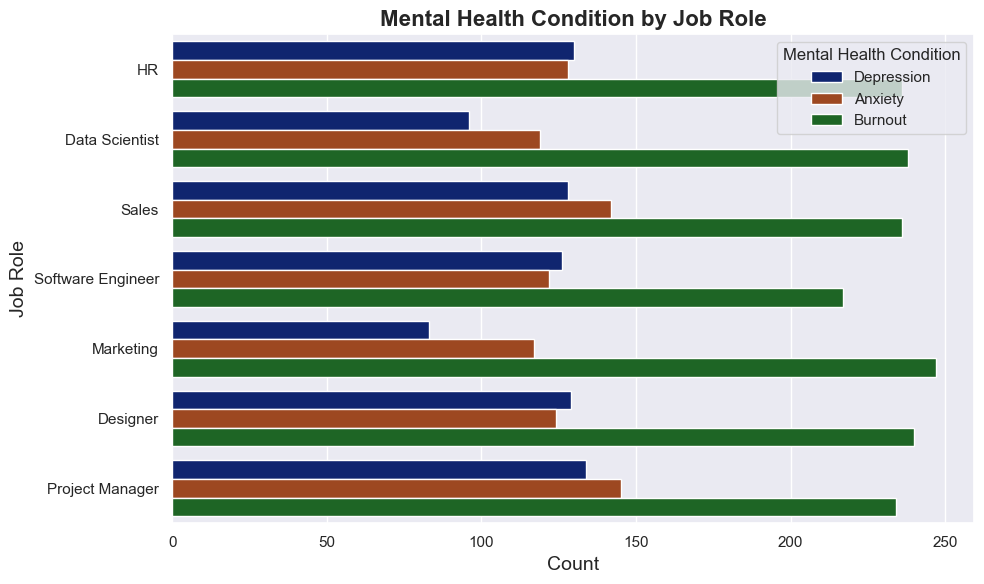

In [78]:
# Handle missing values by filling them with a placeholder (e.g., "Not Specified")
data['Mental_Health_Condition'].fillna('Not Specified', inplace=True)

# Set the style of seaborn
sns.set(style='darkgrid')

# Create a custom dark color palette
palette = sns.color_palette("dark", 5)

# Create the horizontal count plot for Mental Health Condition by Job Role
plt.figure(figsize=(10, 6))
sns.countplot(y='Job_Role', hue='Mental_Health_Condition', data=data, palette=palette)
plt.title('Mental Health Condition by Job Role', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Job Role', fontsize=14)
plt.legend(title='Mental Health Condition')
plt.tight_layout()
plt.show()

 Burnout is the most prevalent mental health condition among employees across various job roles

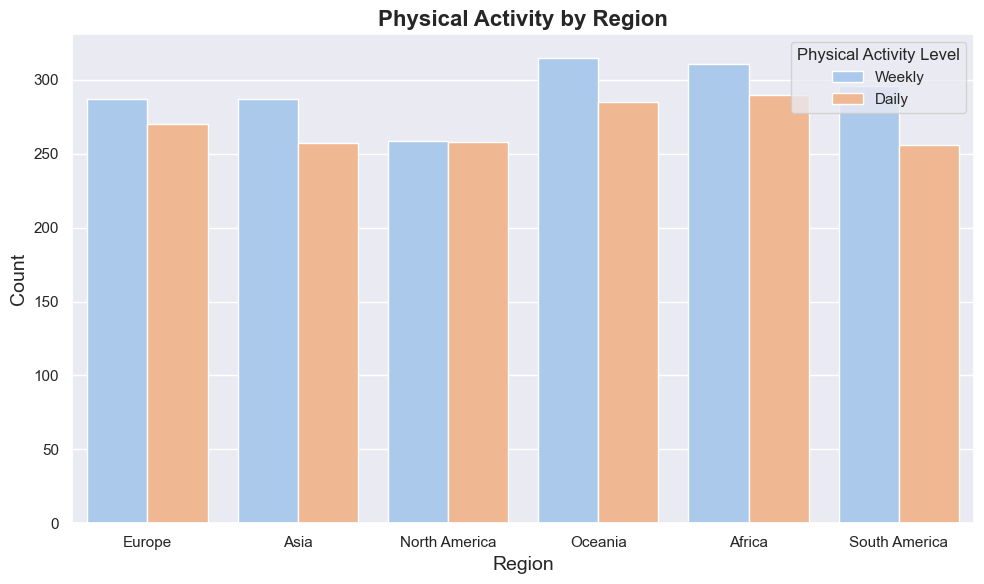

In [50]:
# Set the style of seaborn
sns.set(style='darkgrid')

# Create the count plot for Physical Activity by Region
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Physical_Activity', data=data, palette='pastel')
plt.title('Physical Activity by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Physical Activity Level')
plt.tight_layout()
plt.show()

 At age 25, the hours worked are 40.
 At age 30, the hours worked increase to 45.
 At age 35, the hours drop to 38.
 At age 40, the hours increase to 50.
 At age 45, the hours increase again to 55.

Hours worked per week generally increase with age, particularly after age 35, despite a temporary decrease at age 35.

The analysis shows that employees aged 25-34 and 45-54 are more likely to work remotely, and there is a clear link between work location and stress levels. Remote employees often feel more stress due to issues like social isolation and work-life balance, although some find remote work less stressful. Industries such as Finance, IT, and Healthcare are leading in remote work, often filled by experienced professionals in roles like Project Managers, Designers, and HR. Stress levels vary significantly across different work arrangements, highlighting how the work environment affects employee well-being. Additionally, work hours generally increase with age, especially after 35, even though there is a temporary dip at that age.


Age and Remote Work: Younger (25-34) and older (45-54) age groups are more involved in remote work.

Stress Levels: There is a positive relationship between remote work and stress, with remote workers reporting higher stress levels.

Industry Trends: Finance, IT, and Healthcare are the top sectors adopting remote work, showing a shift toward flexible working arrangements.

Work Hours: Work hours tend to increase with age, especially after 35, indicating greater responsibility among older employees.

Job Roles and Experience: More experienced employees tend to work in remote roles, suggesting that industry experience influences remote work opportunities.

These findings highlight the importance of considering employees' mental health and well-being when understanding remote work arrangements.






